# Zara Sales EDA - Exploratory Data Analysis

This notebook contains a comprehensive exploratory data analysis of Zara sales data.


## 1. Setup & Data Loading


In [1]:
# import package
import pandas as pd

In [2]:
df = pd.read_csv('Zara_sales_EDA.csv',delimiter=';')
df.head(10)

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China
5,117590,End-cap,Yes,clothing,Yes,1282,Zara,https://www.zara.com/us/en/contrasting-collar-...,CONTRASTING COLLAR JACKET,Relaxed fit jacket. Contrasting lapel collar a...,25.95,USD,jackets,WOMAN,Autumn,Cotton,Turkey
6,189118,Front of Store,No,clothing,No,688,Zara,https://www.zara.com/us/en/faux-leather-puffer...,FAUX LEATHER PUFFER JACKET,Faux leather puffer jacket. High collar and lo...,87.99,USD,jackets,MAN,Winter,Acrylic,China
7,182157,Aisle,Yes,clothing,Yes,1711,Zara,https://www.zara.com/us/en/suit-jacket-in-100-...,SUIT JACKET IN 100% LINEN,Straight fit blazer made of linen. Notched lap...,24.00,USD,jackets,WOMAN,Summer,Cotton,Portugal
8,141861,Aisle,No,clothing,Yes,857,Zara,https://www.zara.com/us/en/100-wool-suit-jacke...,100% WOOL SUIT JACKET,Jacket made of Italian wool. Pointed lapel col...,32.95,USD,jackets,WOMAN,Winter,Wool,India
9,137121,Aisle,No,clothing,No,769,Zara,https://www.zara.com/us/en/100-feather-fill-pu...,100% FEATHER FILL PUFFER JACKET,Puffer jacket made of shiny finish technical f...,39.95,USD,jackets,MAN,Autumn,Wool Blend,China


## 2. Data Overview & Initial Exploration


In [3]:
df.describe()

,Product ID,Sales Volume,price
count,20252.000000,20252.000000,20252.000000
mean,208931.432303,1097.400454,41.949061
std,8961.076507,298.234609,23.380960
min,110075.000000,518.000000,12.000000
25%,204442.750000,849.000000,23.950000
50%,209505.500000,990.000000,35.950000
75%,214568.250000,1364.250000,53.950000
max,219631.000000,1940.000000,134.990000


## 3. Data Cleaning & Preprocessing


In [4]:
# Functions 

# clean columns name
def clean_columns(df: pd.DataFrame):
    new_cols = [str.lower(str.replace(col,' ','_')) for col in df.columns]
    for idx,col in enumerate(df.columns):
        df = df.rename(columns={col:new_cols[idx]})
    
    return df

In [5]:
new_df = clean_columns(df)
new_df.head(5)

,product_id,product_position,promotion,product_category,seasonal,sales_volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


In [6]:
# Any dupes product_id 
new_df['is_duplicate'] = new_df['product_id'].duplicated()

new_df.loc[new_df['is_duplicate'] == True,['product_id']]

,product_id


In [7]:
# Find uniques for each columns:
for col in new_df.columns:
    unique_items = new_df[col].nunique()
    print(f"{col} has {unique_items} unique items\n\n")

product_id has 20252 unique items


product_position has 3 unique items


promotion has 2 unique items


product_category has 1 unique items


seasonal has 2 unique items


sales_volume has 1284 unique items


brand has 1 unique items


url has 228 unique items


name has 17215 unique items


description has 221 unique items


price has 330 unique items


currency has 1 unique items


terms has 5 unique items


section has 2 unique items


season has 4 unique items


material has 11 unique items


origin has 12 unique items


is_duplicate has 1 unique items




In [8]:
# Get the columns with variety
columns_to_keep = ["product_position","promotion","product_category","seasonal","sales_volume","name","description","price","terms","section","season","material","origin"]

eda_df = new_df[columns_to_keep]
eda_df.head()

,product_position,promotion,product_category,seasonal,sales_volume,name,description,price,terms,section,season,material,origin
0,Aisle,Yes,clothing,Yes,1243,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,jackets,MAN,Winter,Polyester,Brazil
1,Aisle,Yes,clothing,No,1429,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,jackets,MAN,Autumn,Cotton,Turkey
2,End-cap,Yes,clothing,Yes,1168,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,jackets,WOMAN,Autumn,Polyester,Morocco
3,Aisle,Yes,clothing,No,1348,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,jackets,MAN,Spring,Polyester,China
4,End-cap,Yes,clothing,Yes,1602,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,jackets,WOMAN,Winter,Wool Blend,China


## 4. Descriptive Statistics


In [9]:
# Find the mean,median of price, sale_volume
cols = ["price","sales_volume"]
for col in cols:
    col_mean = eda_df[col].mean()
    col_median = eda_df[col].median()
    
    print(f"{col} mean is {col_mean} ")
    print(f"{col} median is {col_median} ")

price mean is 41.94906083349793 
price median is 35.95 
sales_volume mean is 1097.4004542761209 
sales_volume median is 990.0 


In [10]:
eda_df['price'].std()

np.float64(23.380959822576358)

In [11]:
eda_df['sales_volume'].std()

np.float64(298.23460881992133)

In [12]:
# Different between 75% and 25% 
eda_df['price'].quantile(.75) - eda_df['price'].quantile(.25)

np.float64(30.000000000000004)

In [13]:
eda_df['sales_volume'].quantile(.75) - eda_df['sales_volume'].quantile(.25)

np.float64(515.25)

In [14]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(eda_df[['price','sales_volume']].quantile(percentages))
df.index = [f"{p * 100}%" for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
price,15.99,23.95,35.95,53.95,89.00
sales_volume,727.55,849.00,990.00,1364.25,1613.45


## 5. Price & Sales Volume Analysis


price              Axes(0.125,0.11;0.352273x0.77)
sales_volume    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

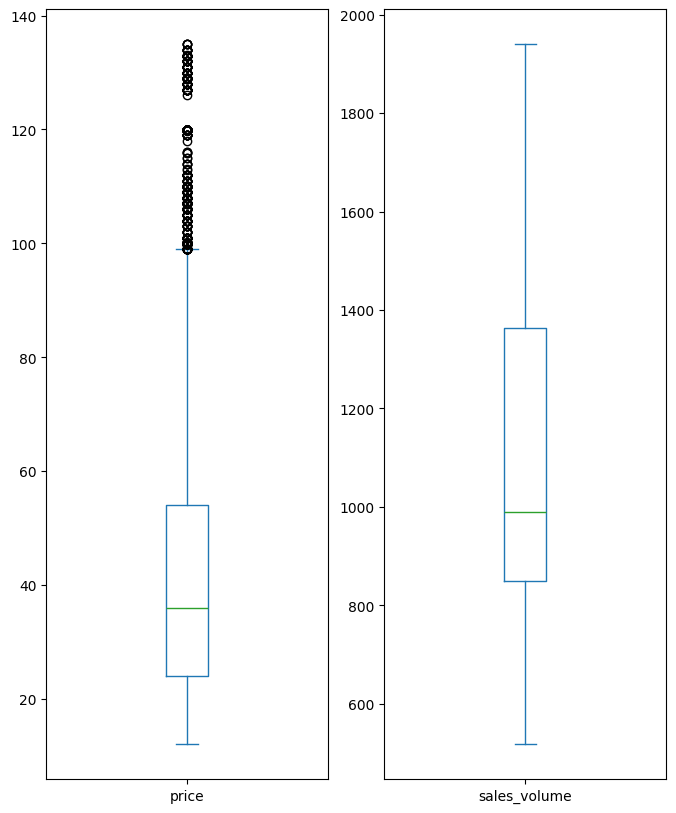

In [15]:
eda_df[['price','sales_volume']].plot.box(subplots=True, figsize=(8,10))

In [16]:
binned_price = pd.cut(eda_df['price'],10)
binned_price.value_counts()

price
(24.299, 36.598]      5441
(11.877, 24.299]      5284
(36.598, 48.897]      3080
(48.897, 61.196]      2728
(61.196, 73.495]      1403
(73.495, 85.794]      1052
(85.794, 98.093]       613
(98.093, 110.392]      367
(110.392, 122.691]     181
(122.691, 134.99]      103
Name: count, dtype: int64

In [17]:
binned_price.name = 'binned_price'
df = pd.concat([eda_df, binned_price], axis=1)
df = df.sort_values(by='price')

groups = []
for group, subset in df.groupby(by='binned_price',observed=False):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'terms': ','.join(subset.terms.sort_values().unique())
    })

print(pd.DataFrame(groups))

             BinRange  Count                                  terms
0    (11.877, 24.299]   5284  jackets,jeans,shoes,sweaters,t-shirts
1    (24.299, 36.598]   5441  jackets,jeans,shoes,sweaters,t-shirts
2    (36.598, 48.897]   3080  jackets,jeans,shoes,sweaters,t-shirts
3    (48.897, 61.196]   2728  jackets,jeans,shoes,sweaters,t-shirts
4    (61.196, 73.495]   1403  jackets,jeans,shoes,sweaters,t-shirts
5    (73.495, 85.794]   1052  jackets,jeans,shoes,sweaters,t-shirts
6    (85.794, 98.093]    613  jackets,jeans,shoes,sweaters,t-shirts
7   (98.093, 110.392]    367  jackets,jeans,shoes,sweaters,t-shirts
8  (110.392, 122.691]    181  jackets,jeans,shoes,sweaters,t-shirts
9   (122.691, 134.99]    103  jackets,jeans,shoes,sweaters,t-shirts


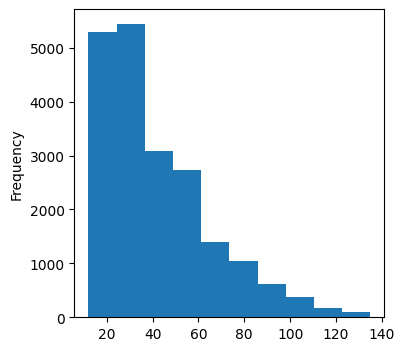

In [18]:
# Plot historgram 
ax = (eda_df['price']).plot.hist(figsize=(4,4))

Text(0.5, 0, 'Price Distribution')

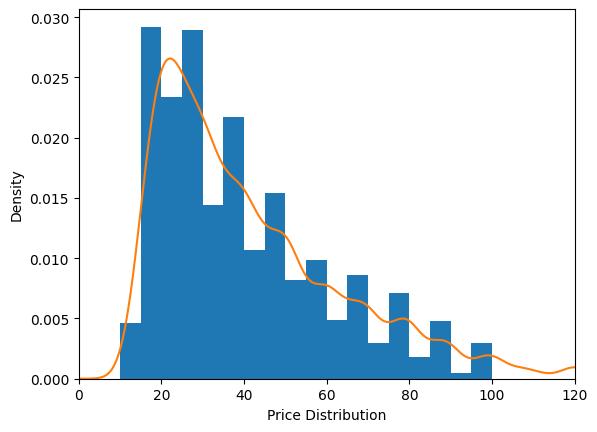

In [19]:
# Use actual price range
ax = eda_df['price'].plot.hist(density=True, xlim=[0,120], bins=range(0,101,5))
eda_df['price'].plot.density(ax=ax)
ax.set_xlabel('Price Distribution')

## 6. Categorical Variables Analysis


Text(0, 0.5, 'Count')

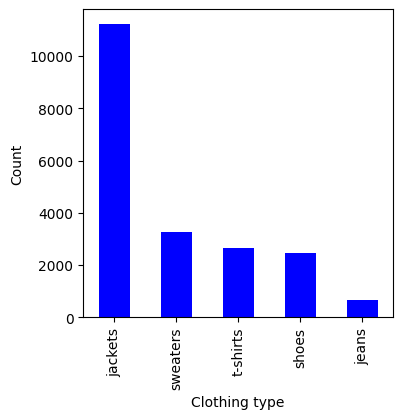

In [20]:
cat_df = eda_df['terms'].value_counts().reset_index()
cat_df.columns = ['terms', 'count']

ax = cat_df.plot.bar(x='terms', y='count', figsize=(4,4), legend=False, color='blue')
ax.set_xlabel('Clothing type')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

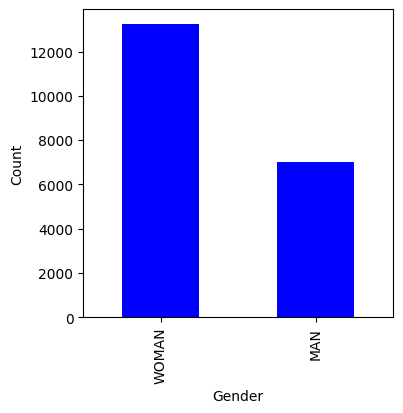

In [21]:
cat_df = eda_df['section'].value_counts().reset_index()
cat_df.columns = ['gender', 'count']

ax = cat_df.plot.bar(x='gender', y='count', figsize=(4,4), legend=False, color='blue')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

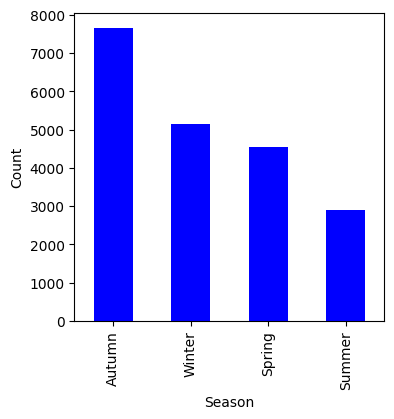

In [22]:
cat_df = eda_df['season'].value_counts().reset_index()
cat_df.columns = ['season', 'count']

ax = cat_df.plot.bar(x='season', y='count', figsize=(4,4), legend=False, color='blue')
ax.set_xlabel('Season')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

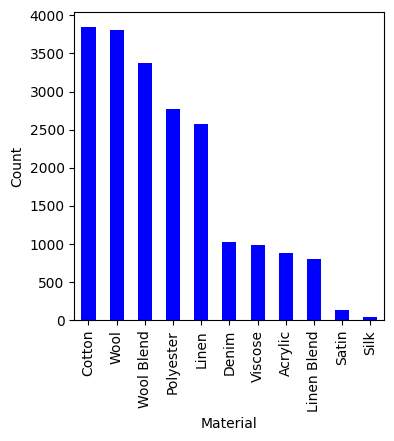

In [23]:
cat_df = eda_df['material'].value_counts().reset_index()
cat_df.columns = ['material', 'count']

ax = cat_df.plot.bar(x='material', y='count', figsize=(4,4), legend=False, color='blue')
ax.set_xlabel('Material')
ax.set_ylabel('Count')